<h1> Sales Analysis Using Python


### The dataset used is the superstore sales dataset.
#### OBJECTIVES
- What is the overall sales trend?
- which are the top products by sales numbers?
- Which are the most sold products?
- Which are the most used shipment methods?
- Which are the most profitable categories and sub-categories?

In [4]:
# Importing the libraries required for the analysis 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_excel("superstore_sales.xlsx")

In [6]:
#data checking 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [7]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [8]:
df.shape

(51290, 21)

In [9]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [10]:
#Checking for null values
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [11]:
# Descriptive stats of the data

df.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
std,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931
min,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000


## EXPLORATORY DATA ANALYSIS

### Sales Trend

In [12]:
df['order_date'].min()

Timestamp('2011-01-01 00:00:00')

In [13]:
df['order_date'].max()

Timestamp('2014-12-31 00:00:00')

In [14]:
# EXTRACTING MONTH & YEAR FROM DATE
df['month_year'] = df['order_date'].apply(lambda x: x.strftime('%Y-%m'))
df['month_year']

0        2011-01
1        2011-01
2        2011-01
3        2011-01
4        2011-01
          ...   
51285    2014-12
51286    2014-12
51287    2014-12
51288    2014-12
51289    2014-12
Name: month_year, Length: 51290, dtype: object

In [17]:
# Month over month sales 
df_sales_trend = df.groupby('month_year').sum()['sales'].reset_index()

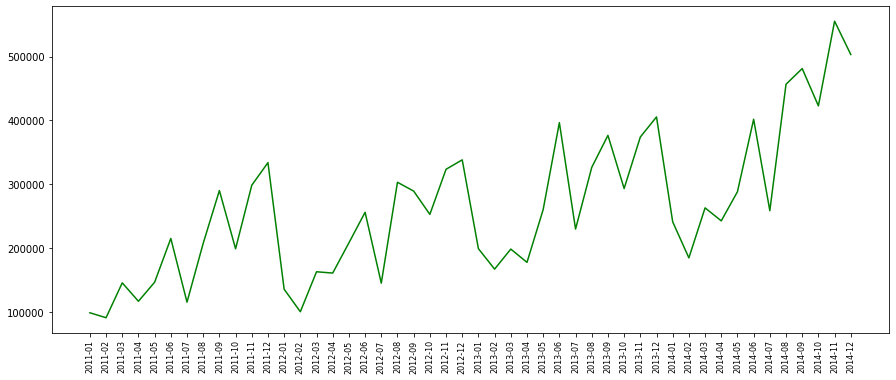

In [22]:
#set fig size
plt.figure(figsize=(15,6))
plt.plot(df_sales_trend['month_year'],df_sales_trend['sales'],color='green')
plt.xticks(rotation = 'vertical',size = 8)
plt.show()

- initial 4 months of every year, sales seeems to be low 
- Overall trend of sales indicate that the sales is growing 

#### TOP 10 PRODUCTS BY SALES

In [24]:
# grouping product name column

product_sales = df.groupby('product_name').sum()['sales'].reset_index()

In [25]:
product_sales.head()

,product_name,sales
0,"""While you Were Out"" Message Book, One Form pe...",25.228
1,"#10 Gummed Flap White Envelopes, 100/Box",41.300
2,#10 Self-Seal White Envelopes,108.682
3,"#10 White Business Envelopes,4 1/8 x 9 1/2",488.904
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.672


In [33]:
#sorting by sales
product_sales = product_sales.sort_values(by='sales',ascending=False,ignore_index=True)

In [34]:
product_sales.head()

,product_name,sales
0,"Apple Smart Phone, Full Size",86935.7786
1,"Cisco Smart Phone, Full Size",76441.5306
2,"Motorola Smart Phone, Full Size",73156.3030
3,"Nokia Smart Phone, Full Size",71904.5555
4,Canon imageCLASS 2200 Advanced Copier,61599.8240


In [35]:
# Top 10 products by sales

product_sales[:10]

,product_name,sales
0,"Apple Smart Phone, Full Size",86935.7786
1,"Cisco Smart Phone, Full Size",76441.5306
2,"Motorola Smart Phone, Full Size",73156.3030
3,"Nokia Smart Phone, Full Size",71904.5555
4,Canon imageCLASS 2200 Advanced Copier,61599.8240
5,"Hon Executive Leather Armchair, Adjustable",58193.4841
6,"Office Star Executive Leather Armchair, Adjust...",50661.6840
7,"Harbour Creations Executive Leather Armchair, ...",50121.5160
8,"Samsung Smart Phone, Cordless",48653.4600
9,"Nokia Smart Phone, with Caller ID",47877.7857


- Most selling products

In [39]:
# group product names 
product_quantity_sold = pd.DataFrame(df.groupby('product_name').sum()['quantity'])

In [40]:
product_quantity_sold = product_quantity_sold.sort_values(by='quantity',ascending=False)
#TOP 10 SELLING PRODUCTS
product_quantity_sold[:10]

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


### PREFERRED SHIPMENT MODE

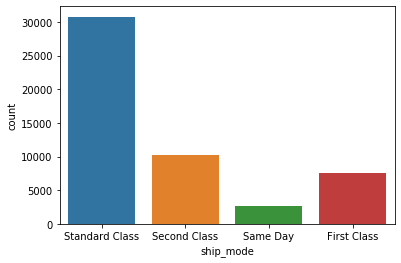

In [42]:
sns.countplot(df['ship_mode'])
plt.show()

- Standard Class is the most used shipment mode

### MOST PROFITABLE CATEGORY AND SUB_CATEGORY

In [52]:
# Grouping the data by category and subcategory
profit_category = pd.DataFrame(df.groupby(['category','sub_category']).sum()['profit'])

In [53]:
#sorting by the profit and category
profit_category = profit_category.sort_values(by=['category','profit'],ascending=False)
profit_category

profit
category        sub_category              
Technology      Copiers       258567.54818
                Phones        216717.00580
                Accessories   129626.30620
                Machines       58867.87300
Office Supplies Appliances    141680.58940
                Storage       108461.48980
                Binders        72449.84600
                Paper          59207.68270
                Art            57953.91090
                Envelopes      29601.11630
                Supplies       22583.26310
                Labels         15010.51200
                Fasteners      11525.42410
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870

- Technology is the most profitable category and among them copiers bring in the most profit followed by Phones
- Furniture is the least profitable category and among them Tables have a negative profit. 